<a href="https://colab.research.google.com/github/Rchintalapati0111/Amazon-Book-Analytics-and-Forecasting-/blob/main/book_dataset_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_dataset.csv to merged_dataset.csv


In [ ]:
df = pd.read_csv('merged_dataset.csv')

In [ ]:
df.head()

,Book_Name,Book_Price,Book_Author,Book_Rating,Book_release_date,Book_Image
0,Dr Cuterus: Everything Nobody Tells You: Every...,192,Dr Tanaya Narendra,512,12 December 2022,https://m.media-amazon.com/images/I/81RMLBE+sH...
1,MTG Objective NCERT at your FINGERTIPS Biology...,182.,MTG Editorial Board,6,19 October 2023,https://m.media-amazon.com/images/I/81nkH5ZjqZ...
2,Relativity: The Special And The General Theory...,0,Albert Einstein,"4,583",15 June 2017,https://m.media-amazon.com/images/I/712UNxm026...
3,Black Holes (L) : The Reith Lectures [Paperbac...,697,Stephen Hawking,"7,573",11 July 2016,https://m.media-amazon.com/images/I/91elhBJsIT...
4,MTG Objective NCERT at your FINGERTIPS Chemist...,149,MTG Editorial Board,12,19 October 2023,https://m.media-amazon.com/images/I/81s-tTkv2R...


### Data Cleaning

In [ ]:
# Convert 'Book_Price' to numeric, handling non-numeric characters:

df['Book_Price'] = pd.to_numeric(df['Book_Price'].str.replace('[^\d.]', ''), errors='coerce')

# Convert 'Book_Rating' to numeric and also considering commas:

df['Book_Rating'] = pd.to_numeric(df['Book_Rating'].str.replace(',', ''), errors='coerce')

# Convert 'Book_release_date' to datetime format:

df['Book_release_date'] = pd.to_datetime(df['Book_release_date'], errors='coerce', dayfirst=True)

# Missing value removal:

df_cleaned = df.dropna()


df_cleaned.head()

#df['Book_Price']

<ipython-input-5-a980c3628ee3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Book_Price'] = pd.to_numeric(df['Book_Price'].str.replace('[^\d.]', ''), errors='coerce')


,Book_Name,Book_Price,Book_Author,Book_Rating,Book_release_date,Book_Image
0,Dr Cuterus: Everything Nobody Tells You: Every...,192.0,Dr Tanaya Narendra,512.0,2022-12-12,https://m.media-amazon.com/images/I/81RMLBE+sH...
1,MTG Objective NCERT at your FINGERTIPS Biology...,182.0,MTG Editorial Board,6.0,2023-10-19,https://m.media-amazon.com/images/I/81nkH5ZjqZ...
2,Relativity: The Special And The General Theory...,0.0,Albert Einstein,4583.0,2017-06-15,https://m.media-amazon.com/images/I/712UNxm026...
3,Black Holes (L) : The Reith Lectures [Paperbac...,697.0,Stephen Hawking,7573.0,2016-07-11,https://m.media-amazon.com/images/I/91elhBJsIT...
4,MTG Objective NCERT at your FINGERTIPS Chemist...,149.0,MTG Editorial Board,12.0,2023-10-19,https://m.media-amazon.com/images/I/81s-tTkv2R...


In [ ]:
# Finding the number of null values in the numeric columns:

print(df['Book_Price'].isna().sum())

print(df['Book_Rating'].isna().sum())

print(len(df['Book_Rating']))

0
1125
33505


### Observation:
We can see that the len of df is 33505 and the number of null values if 1125 in Book_Rating.

>


This constitutes 3.35% of the total dataset and we will drop these values.

In [ ]:
# Dropping the null values:

df['Book_Rating'].dropna()

df_cleaned

,Book_Name,Book_Price,Book_Author,Book_Rating,Book_release_date,Book_Image
0,Dr Cuterus: Everything Nobody Tells You: Every...,192.0,Dr Tanaya Narendra,512.0,2022-12-12,https://m.media-amazon.com/images/I/81RMLBE+sH...
1,MTG Objective NCERT at your FINGERTIPS Biology...,182.0,MTG Editorial Board,6.0,2023-10-19,https://m.media-amazon.com/images/I/81nkH5ZjqZ...
2,Relativity: The Special And The General Theory...,0.0,Albert Einstein,4583.0,2017-06-15,https://m.media-amazon.com/images/I/712UNxm026...
3,Black Holes (L) : The Reith Lectures [Paperbac...,697.0,Stephen Hawking,7573.0,2016-07-11,https://m.media-amazon.com/images/I/91elhBJsIT...
4,MTG Objective NCERT at your FINGERTIPS Chemist...,149.0,MTG Editorial Board,12.0,2023-10-19,https://m.media-amazon.com/images/I/81s-tTkv2R...
...,...,...,...,...,...,...
32734,Educart CBSE Class 12 Question Bank Biology fo...,426.0,Arihant Experts,9.0,2023-10-28,https://m.media-amazon.com/images/W/MEDIAX_792...
32735,Educart CBSE Class 10 Final Revision Book for ...,178.0,Oswaal Editorial Board,538.0,2023-10-28,https://m.media-amazon.com/images/W/MEDIAX_792...
32736,ICSE Chapterwise Topicwise Solved Papers 2023-...,292.0,Dreamland Publications,88.0,2023-08-31,https://m.media-amazon.com/images/W/MEDIAX_792...
32737,"OLD NCERT 3 BOOK COMBO - ANCIENT, MEDIVAL & MO...",799.0,Shivdas Editorial,104.0,2022-01-01,https://m.media-amazon.com/images/W/MEDIAX_792...


In [ ]:
df['Book_Image'].isna().sum()

0

In [ ]:
# Finding outliers:

def find_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Finding outliers:

            mask = (df[column] < lower_bound) | (df[column] > upper_bound)
            outliers[column] = df[column][mask]
    return outliers

# Find outliers in the DataFrame:

outliers = find_outliers(df)

# Display outliers for each column:

for column, values in outliers.items():
    print(f"Outliers in {column}:")
    print(values)

print(len(df['Book_Price']))

print(len(df['Book_Rating']))



Outliers in Book_Price:
10        1525.0
16        5700.0
82       11128.0
88        2549.0
106       1799.0
          ...   
33052     1690.0
33172     1519.0
33311     1585.0
33335     1932.0
33375     2502.0
Name: Book_Price, Length: 3284, dtype: float64
Outliers in Book_Rating:
2         4583.0
3         7573.0
6        14275.0
7         4626.0
11        7386.0
          ...   
32607    14605.0
32991    10992.0
33060    26102.0
33313    16064.0
33468     5095.0
Name: Book_Rating, Length: 4933, dtype: float64
33505
33505


###Observation:
We can note that the % of outliers in both columns is quite high and we can't drop them. So we will use binning to reduce the impact of minor observation errors.

In [ ]:
# Binning:

price_bins = [0, 100, 200, 500, 1000, 5000, df['Book_Price'].max()]

rating_bins = [0, 1, 2, 3, 4, 5, df['Book_Rating'].max()]


df['Price_Bin'] = pd.cut(df['Book_Price'], bins=price_bins)

df['Rating_Bin'] = pd.cut(df['Book_Rating'], bins=rating_bins)

print(df[['Book_Price', 'Price_Bin', 'Book_Rating', 'Rating_Bin']].head())

   Book_Price        Price_Bin  Book_Rating       Rating_Bin
0       192.0   (100.0, 200.0]        512.0  (5.0, 498043.0]
1       182.0   (100.0, 200.0]          6.0  (5.0, 498043.0]
2         0.0              NaN       4583.0  (5.0, 498043.0]
3       697.0  (500.0, 1000.0]       7573.0  (5.0, 498043.0]
4       149.0   (100.0, 200.0]         12.0  (5.0, 498043.0]


In [ ]:
# Counting the number of outliers after binning:

price_bin_counts = df['Price_Bin'].value_counts().sort_index()

print("Counts in each Price Bin:")

print(price_bin_counts)

# Count the number of entries in each rating bin
rating_bin_counts = df['Rating_Bin'].value_counts().sort_index()

print("\nCounts in each Rating Bin:")

print(rating_bin_counts)

Counts in each Price Bin:
(0.0, 100.0]          1205
(100.0, 200.0]        3040
(200.0, 500.0]       11034
(500.0, 1000.0]       4632
(1000.0, 5000.0]      4446
(5000.0, 79384.0]      482
Name: Price_Bin, dtype: int64

Counts in each Rating Bin:
(0.0, 1.0]           614
(1.0, 2.0]           538
(2.0, 3.0]           360
(3.0, 4.0]           325
(4.0, 5.0]           301
(5.0, 498043.0]    30242
Name: Rating_Bin, dtype: int64


In [ ]:
# Normalizing the values of book ratings:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 5))

scaled_ratings = scaler.fit_transform(df['Book_Rating'].values.reshape(-1, 1))

df['Normalized_Rating'] = scaled_ratings

df[['Book_Rating', 'Normalized_Rating']].head()


,Book_Rating,Normalized_Rating
0,512.0,0.005130
1,6.0,0.000050
2,4583.0,0.046000
3,7573.0,0.076018
4,12.0,0.000110


In [ ]:
print(df['Normalized_Rating'].min())

print(df['Normalized_Rating'].max())

0.0
5.0


In [ ]:
# Finding outliers:

def find_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Checking numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Finding outliers:

            mask = (df[column] < lower_bound) | (df[column] > upper_bound)
            outliers[column] = df[column][mask]
    return outliers

# Find outliers in the DataFrame:

outliers = find_outliers(df)

for column, values in outliers.items():
    print(f"Outliers in {column}:")
    print(values)



Outliers in Book_Price:
10        1525.0
16        5700.0
82       11128.0
88        2549.0
106       1799.0
          ...   
33052     1690.0
33172     1519.0
33311     1585.0
33335     1932.0
33375     2502.0
Name: Book_Price, Length: 3284, dtype: float64
Outliers in Book_Rating:
2         4583.0
3         7573.0
6        14275.0
7         4626.0
11        7386.0
          ...   
32607    14605.0
32991    10992.0
33060    26102.0
33313    16064.0
33468     5095.0
Name: Book_Rating, Length: 4933, dtype: float64
Outliers in Normalized_Rating:
2        0.046000
3        0.076018
6        0.143301
7        0.046432
11       0.074140
           ...   
32607    0.146614
32991    0.110342
33060    0.262036
33313    0.161262
33468    0.051140
Name: Normalized_Rating, Length: 4933, dtype: float64


In [ ]:
# Calculate IQR:

Q1 = df['Normalized_Rating'].quantile(0.25)

Q3 = df['Normalized_Rating'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds:

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

# Cap the outliers:

df['Capped_Rating'] = df['Normalized_Rating'].clip(lower=lower_bound, upper=upper_bound)


print(df[['Normalized_Rating', 'Capped_Rating']].head())


   Normalized_Rating  Capped_Rating
0           0.005130       0.005130
1           0.000050       0.000050
2           0.046000       0.043195
3           0.076018       0.043195
4           0.000110       0.000110


In [ ]:
# Recalculate the IQR for the Capped_Rating:

Q1_capped = df['Capped_Rating'].quantile(0.25)

Q3_capped = df['Capped_Rating'].quantile(0.75)

IQR_capped = Q3_capped - Q1_capped

lower_bound_capped = Q1_capped - 1.5 * IQR_capped

upper_bound_capped = Q3_capped + 1.5 * IQR_capped

outliers_capped = df[(df['Capped_Rating'] < lower_bound_capped) | (df['Capped_Rating'] > upper_bound_capped)]

# Counting the number of outliers:

num_outliers_capped = len(outliers_capped)

print(f"Number of outliers after capping: {num_outliers_capped}")


Number of outliers after capping: 0


### Observation: We can see that after the process of capping, the number of outliers is 0.

### EDA:

<Axes: >

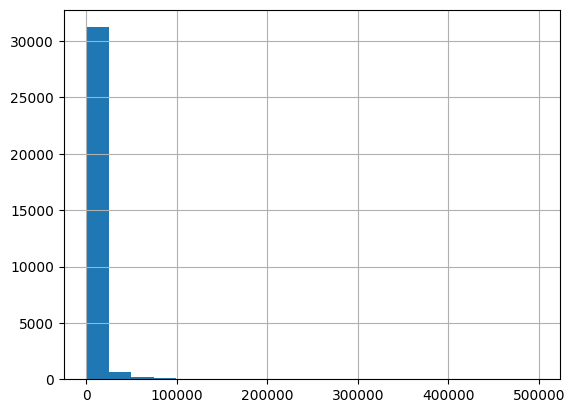

In [ ]:
df['Book_Rating'].hist(bins=20)

###Conclusion:

The above plot represents the distribution of book ratings in a given dataset. It can be inferred that within the dataset, there are a few books with a high number of ratings, while the vast majority of books have a low number of ratings, indicating a high concentration of books in the lower rating count category.

<Axes: >

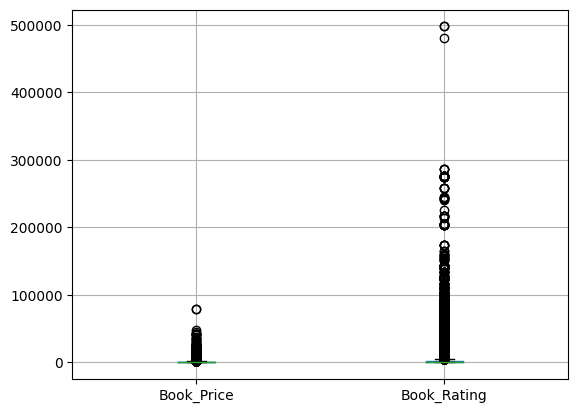

In [ ]:
df.boxplot(column=['Book_Price', 'Book_Rating'])

### Conclusion:

The boxplot indicates that both book prices and ratings have outliers. Book prices generally are low, with a tight interquartile range close to zero, and a few extreme values. Book ratings show a wider spread with more variability, and numerous outliers are present above the upper whisker.

<Axes: >

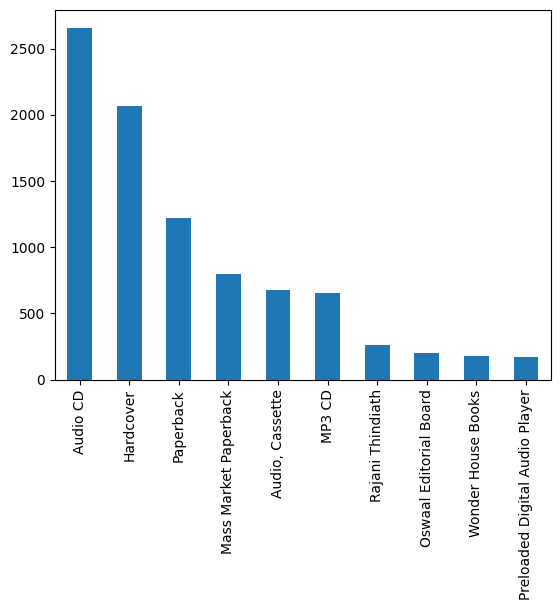

In [ ]:
df['Book_Author'].value_counts().head(10).plot.bar()

### Conclusion:

The bar chart represents the top 10 book formats or editions associated with a particular author or group of authors in the dataset. Audio CDs and hardcovers are the most common formats, indicating a preference or greater production in these mediums. Paperback and mass-market paperback follow, suggesting they are also popular but less so than audio and hardcover. The other formats, including audio cassettes, MP3 CDs, and various publishers or series like 'Rajni Thindiath', 'Oswal Editorial Board', 'Wonder House Books', and 'Preloaded Digital Audio Player', have significantly fewer books, indicating these are less common or niche in this collection of data.

<Axes: xlabel='Book_Rating', ylabel='Book_Price'>

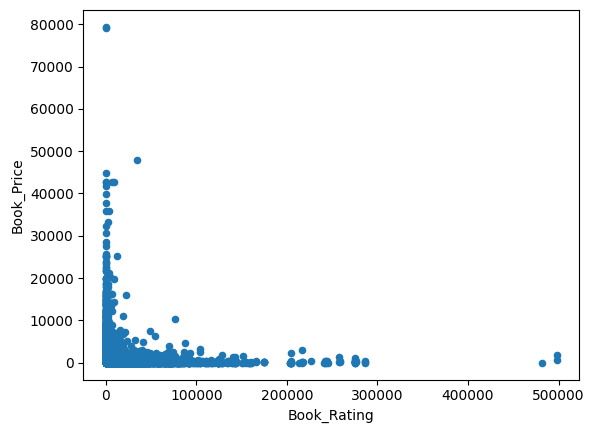

In [ ]:
df.plot.scatter(x='Book_Rating', y='Book_Price')

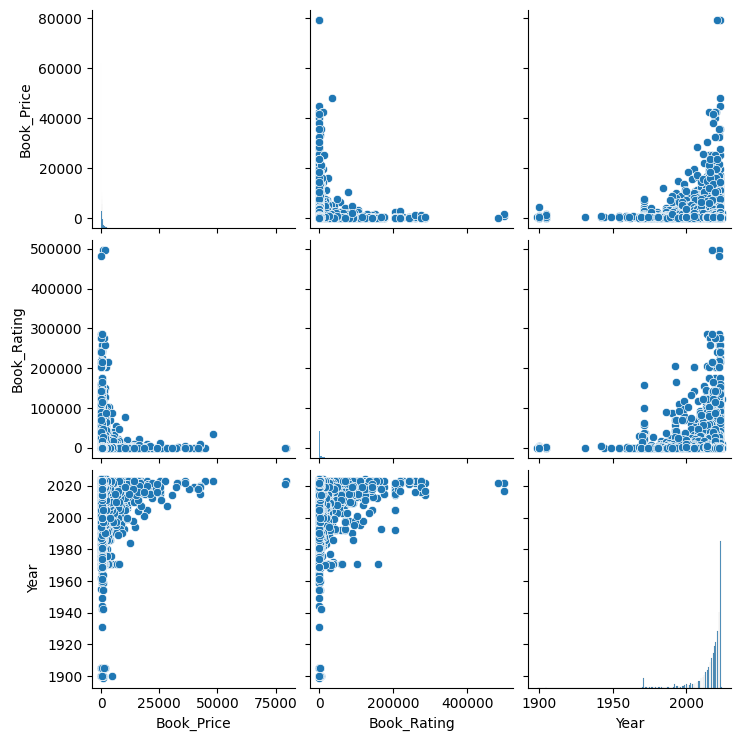

In [ ]:
import seaborn as sns

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

sns.pairplot(df[['Book_Price', 'Book_Rating', 'Year']])

###Conclusion:

The pairplot provides a scatterplot matrix illustrating the relationships between book price, book rating, and release year. The plots indicate that both book price and book rating have a concentration of data points at the lower end, with some extreme values, showing a positive skew. There's no clear trend or correlation between book price and rating. Release year data is heavily skewed towards more recent years, with few books from earlier years, and there is no discernible pattern between year and price or rating. This suggests that recent years have seen a larger number of book releases, but the increase in quantity does not necessarily correlate with higher prices or ratings.

<Axes: ylabel='Density'>

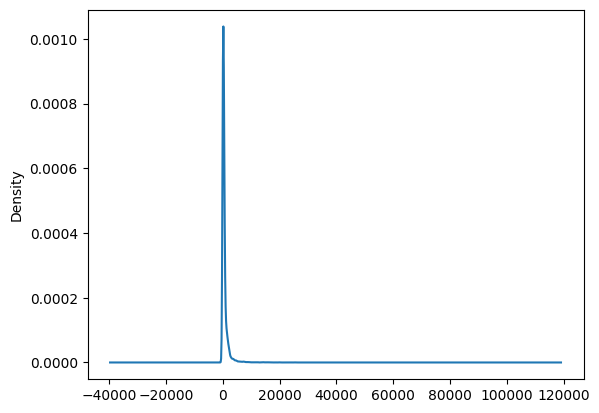

In [ ]:
df['Book_Price'].plot.kde()

### Conclusion:

The kernel density estimate (KDE) plot indicates that the distribution of book prices is highly concentrated around a very low value, near zero. The peak is quite sharp, suggesting that the majority of the book prices are clustered within a narrow range. There's a long tail extending to the right, which indicates that there are some books with much higher prices, but these are relatively rare compared to the low-priced books. The density near these higher values is very low, reflecting the rarity of such expensive books. Overall, the distribution of book prices is positively skewed with most books priced low and a few outliers with high prices.

<Axes: xlabel='Year'>

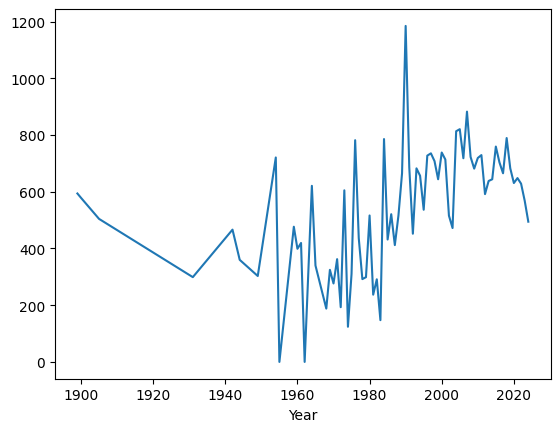

In [ ]:
df.groupby('Year')['Book_Price'].mean().plot()


###Conclusion:

The line graph suggests that the average book price has fluctuated over the years since 1900. There's a noticeable trend of increasing prices from around the 1960s onwards, with some peaks indicating years when the average book price was particularly high. After the 2000s, there's a general trend of decline in average price, followed by more variability. There are a few pronounced spikes, which could indicate years when particularly expensive books were published or when the average prices were unusually high. The trend suggests that while there has been an overall increase in book prices over the last century, there are significant year-to-year fluctuations.

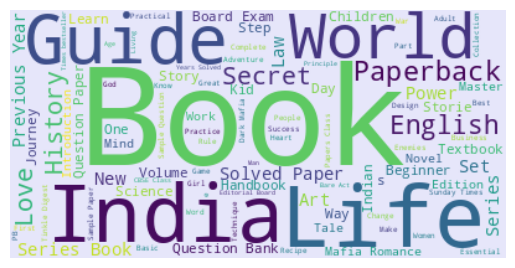

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df['Book_Name'].dropna())
wordcloud = WordCloud(background_color='lavender').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Conclusion:

The word cloud visualizes the most frequent words in the book names from the dataset. Prominent words like "Guide," "Book," "India," and "Paperback" suggest a strong presence of educational and reference materials, possibly targeting the Indian market. Words such as "History," "Series," and "Solved Paper" imply that academic texts, historical works, and solution sets for examinations are common. The size of "India" indicates that either a lot of books are about India or it's a significant market for these books. The diversity of words, including "Art," "Law," "Romance," and "Science," reflects a wide range of genres and subjects represented in the collection.

###Personalised Recommendations:

In [ ]:
df.head()

,Book_Name,Book_Price,Book_Author,Book_Rating,Book_release_date,Book_Image,Price_Bin,Rating_Bin,Normalized_Rating,Capped_Rating,Year
0,Dr Cuterus: Everything Nobody Tells You: Every...,192.0,Dr Tanaya Narendra,512.0,2022-12-12,https://m.media-amazon.com/images/I/81RMLBE+sH...,"(100.0, 200.0]","(5.0, 498043.0]",0.005130,0.005130,2022.0
1,MTG Objective NCERT at your FINGERTIPS Biology...,182.0,MTG Editorial Board,6.0,2023-10-19,https://m.media-amazon.com/images/I/81nkH5ZjqZ...,"(100.0, 200.0]","(5.0, 498043.0]",0.000050,0.000050,2023.0
2,Relativity: The Special And The General Theory...,0.0,Albert Einstein,4583.0,2017-06-15,https://m.media-amazon.com/images/I/712UNxm026...,NaN,"(5.0, 498043.0]",0.046000,0.043195,2017.0
3,Black Holes (L) : The Reith Lectures [Paperbac...,697.0,Stephen Hawking,7573.0,2016-07-11,https://m.media-amazon.com/images/I/91elhBJsIT...,"(500.0, 1000.0]","(5.0, 498043.0]",0.076018,0.043195,2016.0
4,MTG Objective NCERT at your FINGERTIPS Chemist...,149.0,MTG Editorial Board,12.0,2023-10-19,https://m.media-amazon.com/images/I/81s-tTkv2R...,"(100.0, 200.0]","(5.0, 498043.0]",0.000110,0.000110,2023.0


### Content Based Recommendation System:

In [ ]:
# Fill NaN values in 'Book_Author' with a placeholder:

df['Book_Author'] = df['Book_Author'].fillna('Unknown')

In [ ]:
# Content based recommendation system:

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

target_book = df.loc[0]

# Creating TF-IDF features for 'Book_Author':

tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1, 3),
                        max_df=0.5,
                        min_df=3,
                        max_features=10000,
                        sublinear_tf = True)

tfidf_matrix = tfidf.fit_transform(df['Book_Author'])

# Cosine similarity matrix:

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get the most similar books:

def get_similar_books(title, cosine_sim=cosine_sim):



    idx = df.index[df['Book_Name'] == title].tolist()[0]


    sim_scores = list(enumerate(cosine_sim[idx]))



    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)



    sim_scores = sim_scores[1:11]



    book_indices = [i[0] for i in sim_scores]



    return df['Book_Name'].iloc[book_indices]

similar_books = get_similar_books(target_book['Book_Name'])

similar_books



3561     This Book May Save Your Life: Everyday Health ...
13107                                 Surrounded by Idiots
25385    Dr Cuterus: Everything Nobody Tells You: Every...
6661          Death's Obsession: A Paranormal Dark Romance
10093                                           Elder Race
3707                Rabbit -Tortoise Model for Cancer Cure
4175     Functional Cross Training: The Revolutionary, ...
4336                  Men's Health Ultimate Dumbbell Guide
4338     THE COMPLETE ANTI INFLAMMATORY COOKBOOK FOR BE...
7227                The Power of Awareness (General Press)
Name: Book_Name, dtype: object

In [ ]:
print(df.loc[13107])
print(df.loc[3561, 'Book_Name'])
print(df.loc[25385, 'Book_Name'])
print(df.loc[4175, 'Book_Name'])
print(df.loc[4338, 'Book_Name'])


Book_Name                                         Surrounded by Idiots
Book_Price                                                       299.0
Book_Author                                         Dr Tanaya Narendra
Book_Rating                                                      152.0
Book_release_date                                  2023-09-12 00:00:00
Book_Image           https://m.media-amazon.com/images/W/MEDIAX_792...
Price_Bin                                               (200.0, 500.0]
Rating_Bin                                             (5.0, 498043.0]
Normalized_Rating                                             0.001516
Capped_Rating                                                 0.001516
Year                                                            2023.0
Name: 13107, dtype: object
This Book May Save Your Life: Everyday Health Hacks to Worry Less and Live Better
Dr Cuterus: Everything Nobody Tells You: Everything Nobody Tells You About Your Body [Paperback] Narendra, Dr 

In [ ]:
df['Book_Author']

0         Dr Tanaya Narendra
1        MTG Editorial Board
2            Albert Einstein
3            Stephen Hawking
4        MTG Editorial Board
                ...         
33500                Unknown
33501                Unknown
33502                Unknown
33503                Unknown
33504                Unknown
Name: Book_Author, Length: 33505, dtype: object

### Price Prediction using Baseline ML models:

In [ ]:
# Linear regression with Ridge on Log of Prices:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Extracting the year from Book_release_date:

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

# Selecting features and target variable:

X = df[['Book_Author', 'Normalized_Rating', 'Year']].copy()

# Label Encoding for 'Book_Author':

label_encoder = LabelEncoder()

X['Book_Author'] = label_encoder.fit_transform(X['Book_Author'])

# Handling missing values only for numeric columns:

imputer = SimpleImputer(strategy='mean')

X['Normalized_Rating'] = imputer.fit_transform(X[['Normalized_Rating']])

X['Year'] = imputer.fit_transform(X[['Year']])

# Using the log of Book_Price as the target:

y = np.log(df['Book_Price'] + 1)  # Adding 1 to avoid log(0)

# Splitting the dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model:

ridge_model = Ridge(alpha=100)

# Fit the model:

ridge_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error for Logarithmic Price Prediction : {mse}")


Mean Squared Error for Logarithmic Price Prediction : 7.767406169742813


In [ ]:
# Hyper parameter Tuning:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the parameter grid:

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize the Grid Search model:

grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, verbose=1)

# Fit the Grid Search model:

grid_search.fit(X_train, y_train)

# Extract results from the grid search:

results = grid_search.cv_results_

# Print MSE for each parameter combination:

for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"MSE: {-mean_score} for Parameters: {params}")

# Best parameters and best MSE:

best_parameters = grid_search.best_params_
best_mse = -grid_search.best_score_
print("\nBest Parameters:", best_parameters)
print("Best MSE:", best_mse)

# Using the best model:

best_ridge_model = grid_search.best_estimator_

# Predict using the best model:

y_pred_best = best_ridge_model.predict(X_test)

# Evaluate the best model:

mse_best = mean_squared_error(y_test, y_pred_best)
print(f"\nMean Squared Error for Logarithmic Price Prediction with Best Model: {mse_best}")



Fitting 5 folds for each of 7 candidates, totalling 35 fits
MSE: 7.878007493880558 for Parameters: {'alpha': 0.001}
MSE: 7.878007365554174 for Parameters: {'alpha': 0.01}
MSE: 7.878006083822932 for Parameters: {'alpha': 0.1}
MSE: 7.8779934191787095 for Parameters: {'alpha': 1}
MSE: 7.8778814637700805 for Parameters: {'alpha': 10}
MSE: 7.87779488370222 for Parameters: {'alpha': 100}
MSE: 7.8879841883062145 for Parameters: {'alpha': 1000}

Best Parameters: {'alpha': 100}
Best MSE: 7.87779488370222

Mean Squared Error for Logarithmic Price Prediction with Best Model: 7.767406169742813


In [ ]:
# XGBoost Model:

import xgboost as xgb
from sklearn.metrics import mean_squared_error

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

# Selecting features and target variable:

X = df[['Book_Author', 'Normalized_Rating', 'Year']].copy()

# Label Encoding for 'Book_Author':

label_encoder = LabelEncoder()

X['Book_Author'] = label_encoder.fit_transform(X['Book_Author'])

# Handling missing values only for numeric columns:

imputer = SimpleImputer(strategy='mean')

X['Normalized_Rating'] = imputer.fit_transform(X[['Normalized_Rating']])

X['Year'] = imputer.fit_transform(X[['Year']])

# Using the log of Book_Price as the target:

y = np.log(df['Book_Price'] + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model:

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror',
                             colsample_bytree = 0.3,
                             learning_rate = 0.1,
                             max_depth = 5,
                             alpha = 10,
                             n_estimators = 100)

# Fitting the model:

xgb_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE:

mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Squared Error for XGBoost Model: {mse_xgb}")


Mean Squared Error for XGBoost Model: 7.51316758553482


In [ ]:
# Hyperparameter tuning this model:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the Grid Search model
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(objective ='reg:squarederror'),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=3,
                               verbose=1)

# Fit the Grid Search model
grid_search_xgb.fit(X_train, y_train)

# Best parameters and best MSE
best_parameters_xgb = grid_search_xgb.best_params_
best_mse_xgb = -grid_search_xgb.best_score_
print("Best Parameters for XGBoost:", best_parameters_xgb)
print("Best MSE for XGBoost:", best_mse_xgb)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best MSE for XGBoost: 7.6563229440948914


In [ ]:
# Random forest model:

from sklearn.ensemble import RandomForestRegressor

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

# Selecting features and target variable:

X = df[['Book_Author', 'Normalized_Rating', 'Year']].copy()

# Label Encoding for 'Book_Author':

label_encoder = LabelEncoder()

X['Book_Author'] = label_encoder.fit_transform(X['Book_Author'])

# Handling missing values only for numeric columns:

imputer = SimpleImputer(strategy='mean')

X['Normalized_Rating'] = imputer.fit_transform(X[['Normalized_Rating']])

X['Year'] = imputer.fit_transform(X[['Year']])

# Using the log of Book_Price as the target:

y = np.log(df['Book_Price'] + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the Random Forest regressor model:

rf_model = RandomForestRegressor(n_estimators=200,
                                 max_depth= 10,
                                 random_state=42)

# Fit the model:

rf_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred_rf = rf_model.predict(X_test)

# Calculate MSE:

mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error for Random Forest Model: {mse_rf}")


Mean Squared Error for Random Forest Model: 7.570872587706546


In [ ]:
# Hyperparameter tuning the model:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid:

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the Grid Search model:

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error',
                              cv=3,
                              verbose=1)

# Fit the Grid Search model
grid_search_rf.fit(X_train, y_train)

# Best parameters and best MSE
best_parameters_rf = grid_search_rf.best_params_
best_mse_rf = -grid_search_rf.best_score_
print("Best Parameters for Random Forest:", best_parameters_rf)
print("Best MSE for Random Forest:", best_mse_rf)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best MSE for Random Forest: 7.701593037054521


###Neural Network Implementation:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler

# Scaling the features:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Creating the neural network model:

model = Sequential()

model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

# Compiling the model:

model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model:

model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Predict and evaluate the model:

y_pred_nn = model.predict(X_test_scaled)

# Calculate MSE:

mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error for Neural Network Model: {mse_nn}")


Epoch 1/100
2681/2681 [==============================] - 6s 2ms/step - loss: 8.2331
Epoch 2/100
2681/2681 [==============================] - 4s 2ms/step - loss: 7.8435
Epoch 3/100
2681/2681 [==============================] - 4s 2ms/step - loss: 7.8280
Epoch 4/100
2681/2681 [==============================] - 5s 2ms/step - loss: 7.8158
Epoch 5/100
2681/2681 [==============================] - 4s 2ms/step - loss: 7.8140
Epoch 6/100
2681/2681 [==============================] - 5s 2ms/step - loss: 7.8022
Epoch 7/100
2681/2681 [==============================] - 6s 2ms/step - loss: 7.7932
Epoch 8/100
2681/2681 [==============================] - 4s 2ms/step - loss: 7.7909
Epoch 9/100
2681/2681 [==============================] - 5s 2ms/step - loss: 7.7867
Epoch 10/100
2681/2681 [==============================] - 4s 2ms/step - loss: 7.7801
Epoch 11/100
2681/2681 [==============================] - 4s 2ms/step - loss: 7.7844
Epoch 12/100
2681/2681 [==============================] - 5s 2ms/step - lo

###Observation: We can note that the MSE for the Neural Network Model is 7.59215. This is higher than the MSE of XGBoost Model and so we will choose this as our best model for predicting the log of price.

## Annual Top-Rated Books Study Guide:

In [ ]:
df['Normalized_Rating'].mean()

0.040042007404020696

In [ ]:
df['Book_release_date'] = pd.to_datetime(df['Book_release_date'])

# Define a threshold rating for top-rated books:

threshold_rating = 0.04004

# Filter for top-rated books:

top_rated_books = df[df['Normalized_Rating'] >= threshold_rating].copy()

# Aggregate data by year:

top_books_by_year = top_rated_books.groupby(top_rated_books['Book_release_date'].dt.year).agg({'Book_Name': list})

# Create a DataFrame for the study guide:

study_guide_data = []

for year, books in top_books_by_year.iterrows():
    for book in books['Book_Name']:
        book_details = df[df['Book_Name'] == book].iloc[0]
        study_guide_data.append({
            "Year": year,
            "Book Name": book,
            "Author": book_details['Book_Author'],
            "Rating": book_details['Book_Rating']
        })

study_guide_df = pd.DataFrame(study_guide_data)

study_guide_df


,Year,Book Name,Author,Rating
0,1900.0,Clean Living Fast Food: 7 Paleo Recipes (The C...,DK,4350.0
1,1942.0,7 Secrets From Hindu Calendar Art,Paperback,4958.0
2,1968.0,Ramayana Versus Mahabharata: My Playful Compar...,Amor Towles,28872.0
3,1970.0,The Wrong Bride: The Windsors,Shivdas Editorial,4819.0
4,1970.0,COMMANDO MINI WAR COMICS X 24 Titles Gift Set,Audio CD,30893.0
...,...,...,...,...
5098,2023.0,Oswal - Gurukul 61 Sample Question Papers for ...,MTG Editorial Board,4255.0
5099,2023.0,Oswaal CBSE LMP Last Minute Preparation System...,Unknown,10992.0
5100,2024.0,Operation Bazooka: The True Story behind the H...,MP3 CD,5646.0
5101,2024.0,Acts of God,Nidhi Upadhyay,934.0


In [ ]:
df_filtered = study_guide_df[study_guide_df['Year'] == 1970]

df_filtered

,Year,Book Name,Author,Rating
3,1970.0,The Wrong Bride: The Windsors,Shivdas Editorial,4819.0
4,1970.0,COMMANDO MINI WAR COMICS X 24 Titles Gift Set,Audio CD,30893.0
5,1970.0,50 People Every Christian Should Know: Learnin...,"Audio, Cassette",55.0


##Guiding publishers and sellers with trends on what readers crave:

### Trend Analysis of Booking ratings and prices:

In [ ]:
# Understanding the current market:

yearly_trends = df.groupby('Year').agg({'Book_Price': 'mean', 'Normalized_Rating': 'mean'}).reset_index()

yearly_trends

,Year,Book_Price,Normalized_Rating
0,1899.0,594.000000,0.000592
1,1900.0,578.733333,0.010121
2,1905.0,504.433333,0.003196
3,1931.0,299.000000,0.000442
4,1942.0,466.500000,0.042572
...,...,...,...
67,2020.0,630.882083,0.040416
68,2021.0,648.291694,0.037926
69,2022.0,628.547774,0.045491
70,2023.0,568.540252,0.043205


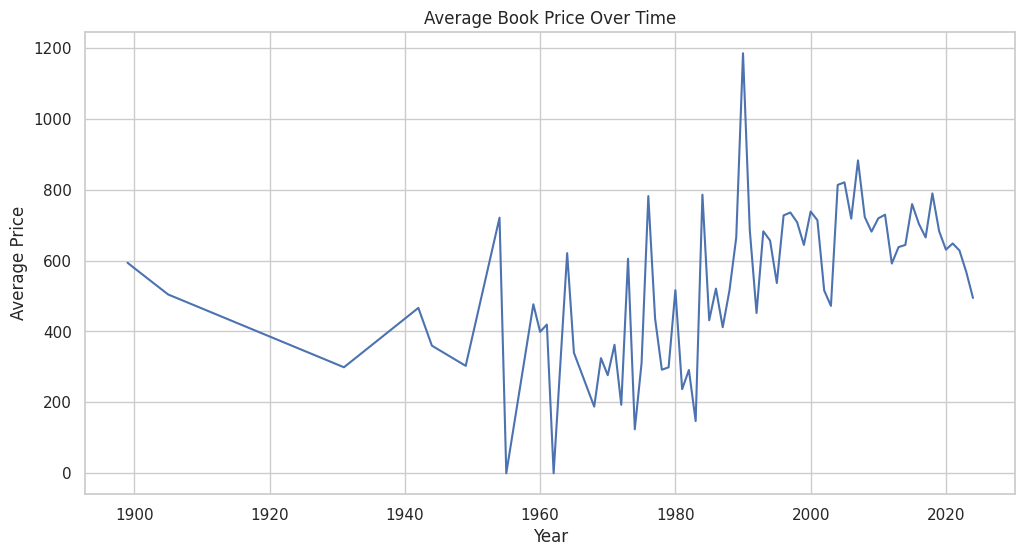

In [ ]:
# Average Book Price by Time:

sns.set(style="whitegrid")

# Plotting Price Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='Book_Price')
plt.title('Average Book Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

##Observation:

1. General Downward Trend Initially: In the early years (from 1900 to around 1960), there is a general downward trend in book prices. This might suggest increased efficiencies in book production, greater market competition, or other lower-cost options.

2. Volatility in Modern Times: Post-1960, there are sharp peaks and troughs. The volatility could be due to various factors such as the introduction of expensive limited editions, textbooks, or the influence of bestsellers that are priced higher.

3. Recent Decline: In more recent years, leading up to 2020, there seems to be a downward slope in average book prices. This could imply increased competition from digital media, the influence of e-books, the entry of discount retailers into the market, or a general trend toward more affordable reading options.

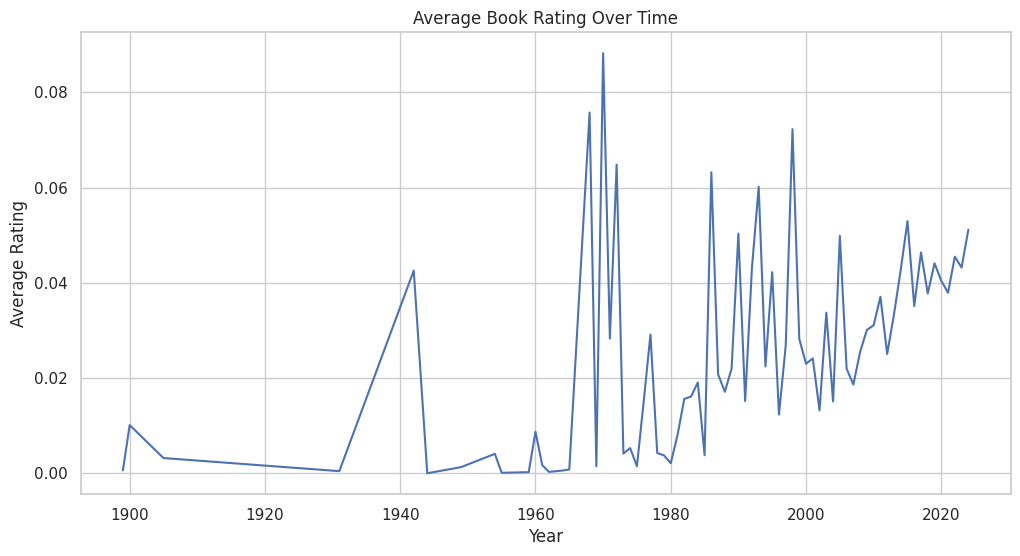

In [ ]:
# Average Book Rating by Time:

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='Normalized_Rating')
plt.title('Average Book Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

## Observation:

There are significant fluctuations in average ratings, especially in the mid to late 20th century.

Also, there seems to be an upward trend in the average ratings in recent years leading up to 2020. This might imply a general improvement in book quality, changes in reader review behaviors, or it could reflect a trend in the publishing industry towards books that are more likely to receive higher ratings.

## Conclusion:

From 2024 onwards, publishers should consider the following strategies:

1. Digital Transformation: We can observe that there is a general decrease in the average price in the recent years. So, it is better to continue adapting to digital trends. Expand into e-books, audiobooks, and online platforms to cater to a growing audience that consumes digital content.

2. Given the upward trend in book ratings, it is important to prioritize high-quality content that meets the evolving standards and expectations of readers.

In [ ]:
# Linear regression with Ridge on Log of Prices:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Extracting the year from Book_release_date:

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

# Selecting features and target variable:

X = df[['Year']].copy()

# Handling missing values only for numeric columns:

imputer = SimpleImputer(strategy='mean')

X['Year'] = imputer.fit_transform(X[['Year']])

# Using the log of Book_Price as the target:

y = np.log(df['Book_Price'] + 1)  # Adding 1 to avoid log(0)

# Splitting the dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model:

ridge_model = Ridge(alpha=100)

# Fit the model:

ridge_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error for Logarithmic Price Prediction : {mse}")




Mean Squared Error for Logarithmic Price Prediction : 7.852899323419252


In [ ]:
# To forecast future prices, we need to provide future years as input to the model
future_years = pd.DataFrame({'Year': range(2021, 2026)})
future_prices = ridge_model.predict(future_years)
print(f"Predicted Future Prices: {np.exp(future_prices)-1}")

Predicted Future Prices: [95.95194452 96.47203344 96.99491233 97.52059614 98.04909994]


In [ ]:
# XGBoost Model:

import xgboost as xgb
from sklearn.metrics import mean_squared_error

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

# Selecting features and target variable:

X = df[['Year']].copy()

# Handling missing values only for numeric columns:

imputer = SimpleImputer(strategy='mean')

X['Year'] = imputer.fit_transform(X[['Year']])

# Using the log of Book_Price as the target:

y = np.log(df['Book_Price'] + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model:

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror',
                             colsample_bytree = 0.3,
                             learning_rate = 0.1,
                             max_depth = 5,
                             alpha = 10,
                             n_estimators = 100)

# Fitting the model:

xgb_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE:

mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Squared Error for XGBoost Model: {mse_xgb}")


Mean Squared Error for XGBoost Model: 7.838060088962114


In [ ]:
# To forecast future prices, we need to provide future years as input to the model
future_years = pd.DataFrame({'Year': range(2021, 2026)})
future_prices = xgb_model.predict(future_years)
print(f"Predicted Future Prices: {np.exp(future_prices)-1}")

Predicted Future Prices: [91.96563  88.81686  90.71061  93.349335 93.349335]


In [ ]:
# Random forest model:

from sklearn.ensemble import RandomForestRegressor

df['Year'] = pd.to_datetime(df['Book_release_date']).dt.year

# Selecting features and target variable:

X = df[['Year']].copy()

# Handling missing values only for numeric columns:

imputer = SimpleImputer(strategy='mean')

X['Year'] = imputer.fit_transform(X[['Year']])

# Using the log of Book_Price as the target:

y = np.log(df['Book_Price'] + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the Random Forest regressor model:

rf_model = RandomForestRegressor(n_estimators=200,
                                 max_depth= 10,
                                 random_state=42)

# Fit the model:

rf_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred_rf = rf_model.predict(X_test)

# Calculate MSE:

mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error for Random Forest Model: {mse_rf}")


Mean Squared Error for Random Forest Model: 7.847168176972426


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler

# Scaling the features:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Creating the neural network model:

model = Sequential()

model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

# Compiling the model:

model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model:

model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Predict and evaluate the model:

y_pred_nn = model.predict(X_test_scaled)

# Calculate MSE:

mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"Mean Squared Error for Neural Network Model: {mse_nn}")


Epoch 1/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.3635
Epoch 2/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.0483
Epoch 3/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.0447
Epoch 4/100
2681/2681 [==============================] - 4s 2ms/step - loss: 8.0305
Epoch 5/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.0390
Epoch 6/100
2681/2681 [==============================] - 4s 2ms/step - loss: 8.0288
Epoch 7/100
2681/2681 [==============================] - 4s 2ms/step - loss: 8.0200
Epoch 8/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.0169
Epoch 9/100
2681/2681 [==============================] - 4s 2ms/step - loss: 8.0214
Epoch 10/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.0087
Epoch 11/100
2681/2681 [==============================] - 5s 2ms/step - loss: 8.0032
Epoch 12/100
2681/2681 [==============================] - 4s 2ms/step - lo

## Book popularity:

In [ ]:
# We will measure book popularity on the basis of Book rating (Normalized Book Rating)

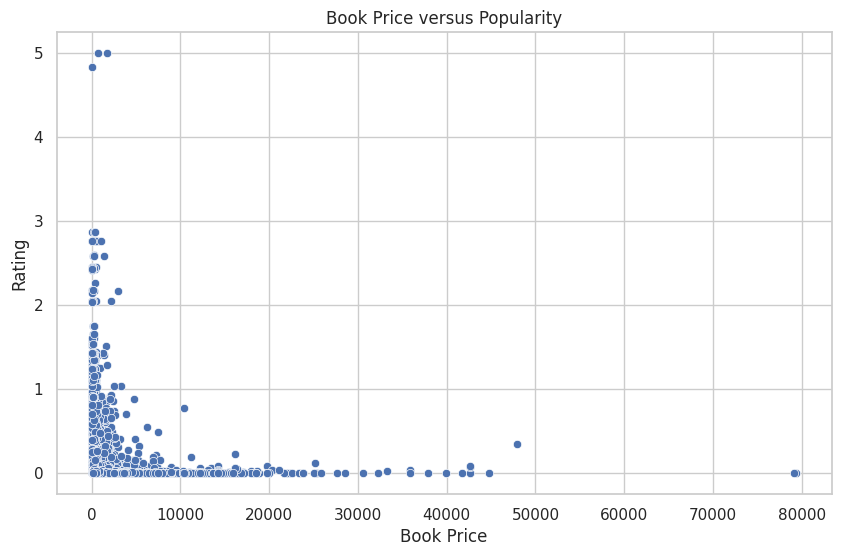

Pearson correlation coefficient between price and popularity: -0.028


In [ ]:
# Using Pearson Correlation Coefficient to determine the strength between book price and rating:

# Scatter plot for price vs. popularity

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Book_Price', y='Normalized_Rating', data=df)
plt.title('Book Price versus Popularity')
plt.xlabel('Book Price')
plt.ylabel('Rating')
plt.show()

# Calculate the Pearson correlation coefficient
df_cleaned = df.dropna(subset=['Normalized_Rating'])
corr_coefficient, _ = pearsonr(df_cleaned['Book_Price'], df_cleaned['Normalized_Rating'])
print(f'Pearson correlation coefficient between price and popularity: {corr_coefficient:.3f}')

## Observation:
A Pearson correlation coefficient of -0.028 between book price and popularity (as measured by normalized rating) indicates a very weak negative linear relationship between these two variables

In [ ]:
# Let us now create new features using Feature Engineering:

import datetime

current_year = datetime.datetime.now().year

df['Book_Age'] = current_year - df['Book_release_date'].dt.year

df.dropna(subset=['Book_Age'], inplace=True)

df['Book_Age'].isna().sum()


0

In [ ]:
author_popularity = df.groupby('Book_Author')['Normalized_Rating'].mean().reset_index()

author_popularity

author_popularity.rename(columns={'Normalized_Rating': 'Author_Popularity'}, inplace=True)

df = df.merge(author_popularity, on='Book_Author')

df['Author_Popularity'] = df['Author_Popularity_x']

df.drop(['Author_Popularity_x', 'Author_Popularity_y'], axis=1, inplace=True)

df.head()


,Book_Name,Book_Price,Book_Author,Book_Rating,Book_release_date,Book_Image,Price_Bin,Rating_Bin,Normalized_Rating,Capped_Rating,Year,Book_Age,Author_Popularity
0,Dr Cuterus: Everything Nobody Tells You: Every...,192.0,Dr Tanaya Narendra,512.0,2022-12-12,https://m.media-amazon.com/images/I/81RMLBE+sH...,"(100.0, 200.0]","(5.0, 498043.0]",0.005130,0.005130,2022.0,2.0,0.016816
1,This Book May Save Your Life: Everyday Health ...,0.0,Dr Tanaya Narendra,5533.0,2023-12-28,https://m.media-amazon.com/images/I/71Zom+0aqO...,NaN,"(5.0, 498043.0]",0.055537,0.043195,2023.0,1.0,0.016816
2,Surrounded by Idiots,299.0,Dr Tanaya Narendra,152.0,2023-09-12,https://m.media-amazon.com/images/W/MEDIAX_792...,"(200.0, 500.0]","(5.0, 498043.0]",0.001516,0.001516,2023.0,1.0,0.016816
3,Dr Cuterus: Everything Nobody Tells You: Every...,188.0,Dr Tanaya Narendra,507.0,2022-12-12,https://m.media-amazon.com/images/W/MEDIAX_792...,"(100.0, 200.0]","(5.0, 498043.0]",0.005080,0.005080,2022.0,2.0,0.016816
4,MTG Objective NCERT at your FINGERTIPS Biology...,182.0,MTG Editorial Board,6.0,2023-10-19,https://m.media-amazon.com/images/I/81nkH5ZjqZ...,"(100.0, 200.0]","(5.0, 498043.0]",0.000050,0.000050,2023.0,1.0,0.020917


In [ ]:
# Let us now perform mMutual Information Regression on this:

from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['Book_Author_Encoded'] = label_encoder.fit_transform(df['Book_Author'])

# Removing nulls:

df.dropna(subset=['Author_Popularity'], inplace=True)

df.dropna(subset=['Normalized_Rating'], inplace=True)

# Prepare your features (X) and target variable (y):

X = df[['Book_Price', 'Year', 'Book_Age', 'Author_Popularity', 'Book_Author_Encoded']]

y = df['Normalized_Rating']

# Calculate mutual information:

mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to display feature names and their corresponding MI scores:

mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

print(mi_results)


               Feature  MI Score
0           Book_Price  0.018743
1                 Year  0.016659
2             Book_Age  0.013126
3    Author_Popularity  0.943485
4  Book_Author_Encoded  0.067348


## Observation:
It can be noted by performing Mutual Information Regression that the features Author_Popularity and Book_Author_encoded are correlated with Normalized_Rating and thus we will select these two to train our model.

In [ ]:
# Model:

# Linear regression with Ridge on Log of Prices:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = df[['Author_Popularity', 'Book_Author_Encoded']]

y = df['Normalized_Rating']

# Splitting the dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model:

ridge_model = Ridge(alpha=1)

# Fit the model:

ridge_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error : {mse}")




Mean Squared Error : 0.020959630239955514


In [ ]:
# XGBoost Model:

import xgboost as xgb
from sklearn.metrics import mean_squared_error

X = df[['Author_Popularity', 'Book_Author_Encoded']]

y = df['Normalized_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model:

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror',
                             colsample_bytree = 0.3,
                             learning_rate = 0.01,
                             max_depth = 5,
                             alpha = 10,
                             n_estimators = 300)

# Fitting the model:

xgb_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred_xgb = xgb_model.predict(X_test)

# Calculate MSE:

mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Squared Error for XGBoost Model: {mse_xgb}")


Mean Squared Error for XGBoost Model: 0.0228001033746399


In [ ]:
# Random forest model:

from sklearn.ensemble import RandomForestRegressor

X = df[['Author_Popularity', 'Book_Author_Encoded']]

y = df['Normalized_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the Random Forest regressor model:

rf_model = RandomForestRegressor(n_estimators=200,
                                 max_depth= 10,
                                 random_state=42)

# Fit the model:

rf_model.fit(X_train, y_train)

# Predict and evaluate the model:

y_pred_rf = rf_model.predict(X_test)

# Calculate MSE:

mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error for Random Forest Model: {mse_rf}")


Mean Squared Error for Random Forest Model: 0.025679488996077072


##Observation:
It can be noted from the above models that Linear Regression with Ridge has the lowest MSE. Thus, we will use this to predict our normalized rating value.

## Text Mining using NLP:

In [ ]:
import re

def preprocess_text(text):

    # Converting to lowercase:

    text = text.lower()

    # Removing punctuation and special characters:

    text = re.sub(r'[^a-z0-9\s]', '', text)

    return text

# Preprocessing of Book name and Book author:

df['Clean_Book_Name'] = df['Book_Name'].apply(preprocess_text)

df['Clean_Book_Author'] = df['Book_Author'].apply(preprocess_text)


In [ ]:
# Extracting keywords:

from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to extract keywords:

vectorizer = CountVectorizer(stop_words='english', max_features=100)

# Fit and transform the data:

book_name_keywords = vectorizer.fit_transform(df['Clean_Book_Name'])

# Frequent words:

book_name_keywords = vectorizer.get_feature_names_out()

print("Top keywords in book names:", book_name_keywords)


Top keywords in book names: ['10' '12' '2023' '202324' '2024' 'act' 'age' 'art' 'bank' 'based'
 'beginners' 'best' 'bestseller' 'board' 'book' 'books' 'business' 'cbse'
 'chapterwise' 'chemistry' 'children' 'class' 'classics' 'collection'
 'complete' 'dark' 'day' 'digest' 'easy' 'edition' 'engineering' 'english'
 'exam' 'exams' 'guide' 'handbook' 'hardcover' 'history' 'india' 'indian'
 'jee' 'journey' 'kids' 'language' 'latest' 'law' 'learn' 'learning'
 'life' 'love' 'mafia' 'man' 'marriage' 'mathematics' 'mind' 'modern'
 'mtg' 'ncert' 'new' 'novel' 'olympiad' 'oswaal' 'paper' 'paperback'
 'papers' 'pb' 'penguin' 'people' 'physics' 'power' 'practical' 'practice'
 'previous' 'question' 'questions' 'revised' 'romance' 'sample' 'science'
 'secret' 'secrets' 'series' 'set' 'short' 'solved' 'stories' 'story'
 'textbook' 'theory' 'thriller' 'time' 'times' 'tinkle' 'vol' 'volume'
 'war' 'way' 'world' 'year' 'years']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation

# Applying CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)

X = vectorizer.fit_transform(df['Clean_Book_Name'])

# Creating the LDA model

lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fitting the model and transforming the data:

lda_result = lda.fit_transform(X)

# Displaying the top words in each topic

for idx, topic in enumerate(lda.components_):

    print(f"Topic #{idx+1}:")

    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))



Topic #1:
years chemistry physics digest act kids tinkle set series books
Topic #2:
science volume art complete vol stories story india english guide
Topic #3:
series novel power mafia dark love new life romance book
Topic #4:
solved board question 10 2023 cbse papers 2024 exam class
Topic #5:
science english india questions practice history world indian paperback edition


### Observation:

1. Educational Focus: There's a strong emphasis on educational material, including textbooks, guides, and exam preparation books.

2. Diverse Genres: Our dataset spans various genres, from children's literature to fiction (including romance and thrillers) to non-fiction educational content.
3. Cultural and Regional Relevance: The presence of specific topics related to India (e.g., Indian literature, CBSE exam books) suggests regional relevance in our dataset.